## Project 3 Submission
- Student name: Julia Müller
- Student pace: self paced
- Scheduled project review date/time: 17.05.2023
- Instructor name: Mark Barbour

### Business Context
This notebook analyses a data set from a telephone company with information about the customer and information about the customer churning or not. Our goal is to build a model to predict customer churn for our stakeholder - the telephone company. The model will identify the most important features from the model and can give recommendation to our stakeholder when customers tend to leave. This will enable to company to take certain prevention activities such as offering discounts or improving the package. 

### Loading packages and data

In [22]:
#importing relevant packages
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import plot_importance

In [3]:
cd data

C:\Users\mullerju\Documents\Flatiron\phase_3\dsc-phase-3-project-v2-3\data


In [4]:
#reading data
df = pd.read_csv("churn.csv")

In [37]:
#inspecting data
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,KS,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [5]:
#checking for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [127]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


There are no missing values in the data set. The majority of data types seem to be correctly formatted, I would only change the string object for international and voice mail plan to 0/1 and the are code from int to string because it's a category.
Regarding the value distribution, we will need to standardize the values before running the model as they are not all on the same scale. 
Next, I will look at the correlations between the items to see if there are any highly correlating columns.

### Preprocessing of the data
In this section, I will clean the data, select features, normalize and split the data.

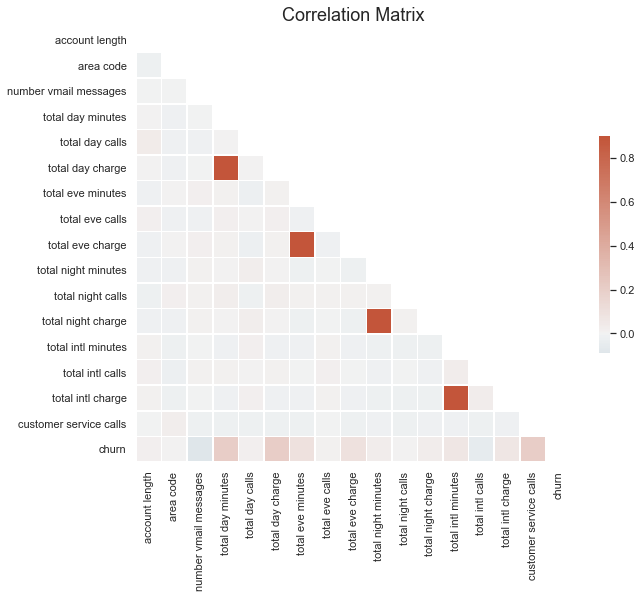

In [4]:
corr = df.corr()
# Create a heatmap using Seaborn
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix', fontsize=18)

# Show the plot
plt.show()

The correlation matrix shows that the columns with charges are highly correlated with their respective minutes columns. I will therefore drop all the columns with the charges. 

In [5]:
#fix the column names and drop columns
df.columns = df.columns.str.replace(' ', '_')
df = df.drop([x for x in df.columns if x.endswith('_charge')],axis=1)
#replace strings with 0/1
df['international_plan'] = df['international_plan'].replace({'no': 0, 'yes': 1})
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'no': 0, 'yes': 1})
# drop phone number and area code.
df = df.drop(['phone_number', 'area_code'], axis=1)
df["churn"] = df["churn"].astype(int)

In [6]:
#check for class imbalance
print(df["churn"].value_counts())
print(df["churn"].value_counts(normalize=True))

0    2850
1     483
Name: churn, dtype: int64
0    0.855086
1    0.144914
Name: churn, dtype: float64


We have class imbalance in the data set. Only 14% of the customers change. So a model that would always predict customers to stay would have an accuracy of 85%. After doing the train test split, I will address this using SMOTE.

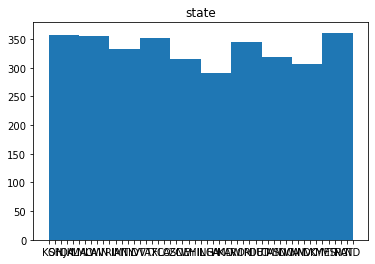

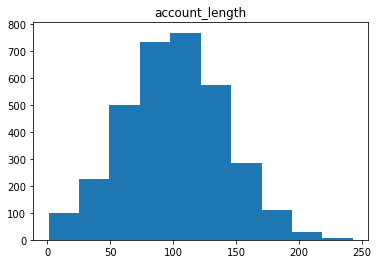

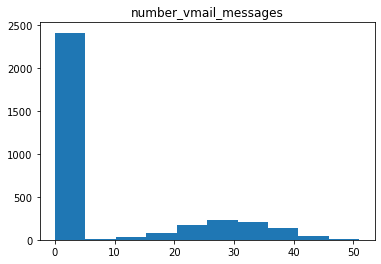

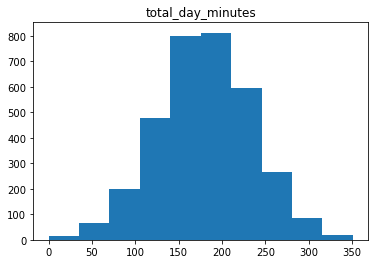

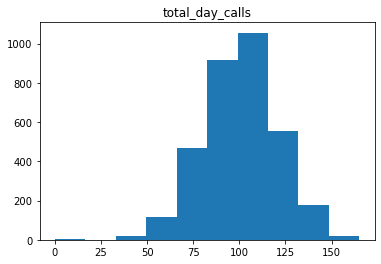

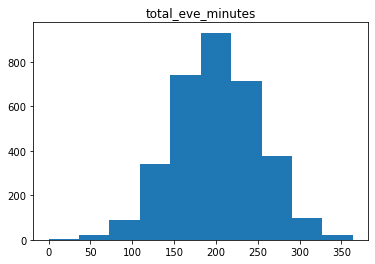

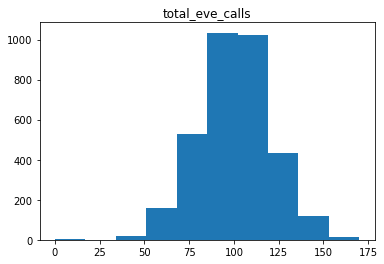

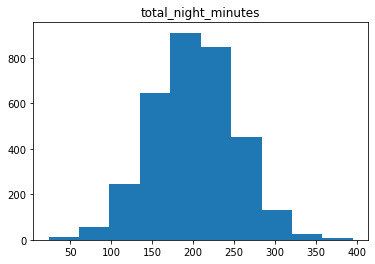

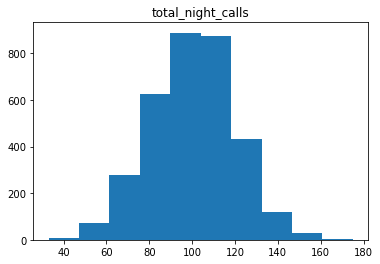

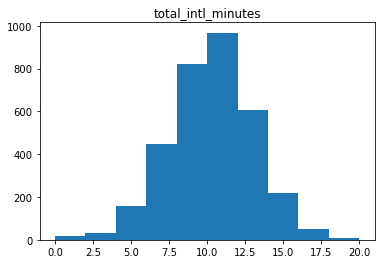

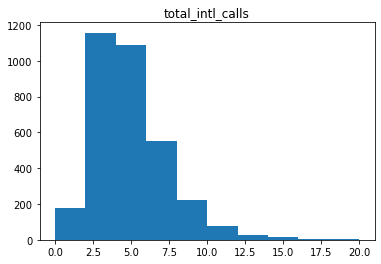

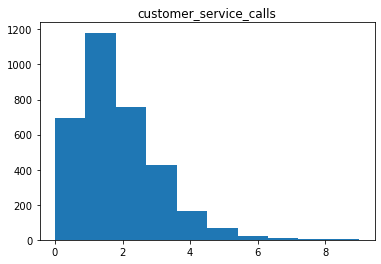

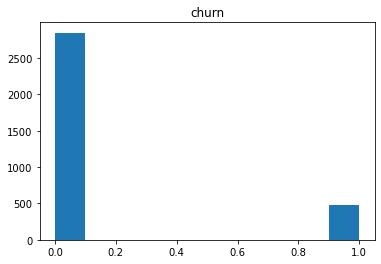

In [8]:
#visualise distribution of values for each columns
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

The majority of columns are normally distributed. The majority of customers do not have an international plan or a voice mail plan. This also explains why the majority of voice mail minutes are 0. Customers service Calls are not distributed normally but they are slightly right skewed. Since I do not want to have a dummy variable for each state, I will categorize the states into regions based on the bureau of statistics.

In [6]:
#map divisions to states
divs = pd.read_csv("division.csv", sep=";")
state_division_map = divs.set_index('Abbreviation')['Division']
#add division to df
df['division'] = df['state'].map(state_division_map)
#drop state column
df.drop(["state"], axis=1, inplace=True)

This should be enough preparation work. I will now start splitting the dataset in target variable y which is the churn indicator and predictors which are all other columns. I'll also have to get some dummy variables for the states. 

In [7]:
y = df["churn"] #set target variable
X = df.drop(["churn"], axis=1) #set predictors
X = pd.get_dummies(X)

I want to have a first look how the different columns are correlated with our target variable. Therefore, I will run a correlation analysis on every column with the target.

In [41]:
# Compute the correlation between the target and each feature
correlations = X.corrwith(y)

# Convert the correlations to a DataFrame and display it
correlations_df = pd.DataFrame(correlations, columns=['correlation'])
correlations_df.sort_values('correlation', ascending=False, inplace=True)
print(correlations_df)

                             correlation
international_plan              0.259852
customer_service_calls          0.208750
total_day_minutes               0.205151
total_eve_minutes               0.092796
total_intl_minutes              0.068239
division_Middle Atlantic        0.045637
total_night_minutes             0.035493
division_West South Central     0.024332
total_day_calls                 0.018459
account_length                  0.016541
total_eve_calls                 0.009233
total_night_calls               0.006141
division_New England            0.004638
division_South Atlantic         0.002265
division_Pacific               -0.003091
division_East South Central    -0.007167
division_Mountain              -0.010148
division_East North Central    -0.013431
division_West North Central    -0.018416
total_intl_calls               -0.052844
number_vmail_messages          -0.089728
voice_mail_plan                -0.102148


On the first look, the international plan, customer service calls and day minutes may have an influence on churn. Since the divisions don't seem to play a role, I will drop them to reduce the number of features for my model. 

In [8]:
X = X.drop([x for x in X.columns if x.startswith('division')],axis=1)

To avoid data leakage, I will do the train test split now before addressing any class imbalance or standardizations.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [44]:
print("Train percent churn:", y_train.value_counts(normalize=True)[1])
print("Test percent churn: ", y_test.value_counts(normalize=True)[1])

Train percent churn: 0.14328582145536384
Test percent churn:  0.15142428785607195


Finally, I will standardize the data, since it's not all on the same scale.

In [10]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

I will now use SMOTE (Synthetic Minority Oversampling Technique) to address the class imbalance. This will randomly choose one of the k-nearest neighbours and use it to create a similar but randomly tweaked new observations.

In [11]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

#values after SMOTE
print("Train percent churn:\n", y_train_resampled.value_counts())

Train percent churn:
 1    2284
0    2284
Name: churn, dtype: int64


### Baseline Model - Logistic Regression
I will create a vanilla baseline model which I will use for comparison later on. My baseline model will be a simple logistic regression only specifying the random state for reproducibility.

In [15]:
lr_clf = LogisticRegression(random_state = 42)
lr_clf.fit(X_train_resampled, y_train_resampled)
y_pred = lr_clf.predict(X_test_scaled)
print('Accuracy on training set:',lr_clf.score(X_train_resampled,y_train_resampled))
print('Accuracy on test set:',lr_clf.score(X_test_scaled,y_test))
print(classification_report(y_test, y_pred))

Accuracy on training set: 0.7697022767075307
Accuracy on test set: 0.7871064467766117
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.40      0.79      0.53       101

    accuracy                           0.79       667
   macro avg       0.68      0.79      0.70       667
weighted avg       0.87      0.79      0.81       667

Positive Class: 1
Precision: 0.3980
Recall: 0.7921
F1-score: 0.5298
Accuracy: 0.7871


{'precision': 0.39800995024875624,
 'recall': 0.7920792079207921,
 'f1_score': 0.5298013245033113,
 'accuracy': 0.7871064467766117}

The vanilla model has an accuracy of 78% on the test and 76% on the training set. This means that it's neither overfitting nor underfitting which is good. The precision and f1 score are not good for class 1 and quite good for class 0. 

Confusion Matrix:
 [[445 121]
 [ 21  80]]


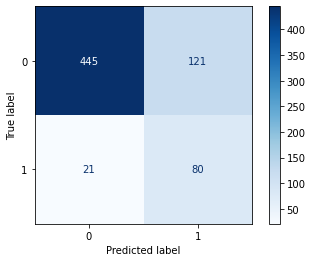

In [48]:
# Print confusion matrix
y_hat_test = lr_clf.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=lr_clf.classes_)
disp.plot(cmap=plt.cm.Blues)

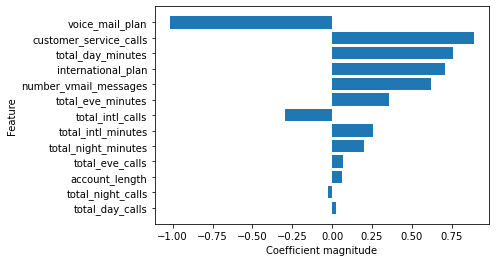

In [49]:
# Replace `model` with your trained logistic regression model
lr_coef = lr_clf.coef_[0]
lr_coef_abs = np.abs(lr_coef)

# Get feature names
feature_names = np.array(X.columns)

# Sort features by absolute coefficient values
sorted_idx = lr_coef_abs.argsort()

# Plot feature importances
plt.barh(range(len(sorted_idx)), lr_coef[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Coefficient magnitude")
plt.ylabel("Feature")
plt.show()

In terms of the accuracy, the model is doing worse than always saying that the customer will not leave. I'm ok to accept a few more false positives in comparison to false negatives. It's worse losing a customer completely than offering a customer that did not intend to leave some gratifications. 
In terms of the feature importance, customer service calls seem to be a good predictor for churn.

### Second model - Random Forest Classification
My second model will be a random forest classification. Random forest can handle well non-linear relationships and reduces overfitting through the bagging technique. 

In [51]:
#instantiate and fit RFC model
rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_train_resampled,y_train_resampled)
# Predict the labels of the test data
y_pred = rf_clf.predict(X_test_scaled)

# Evaluate the performance of the classifier using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test_scaled)[:, 1])

# Print the results
print(classification_report(y_test, y_pred))
print('Accuracy on training set:',rf_clf.score(X_train_resampled,y_train_resampled))
print('Accuracy on test set:',rf_clf.score(X_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.83      0.81      0.82       101

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.89       667
weighted avg       0.95      0.95      0.95       667

Accuracy on training set: 1.0
Accuracy on test set: 0.9460269865067467


The model actually performs quite well. I would prefer to further increase my recall score for the churn class so that I get a better score at really catching those customers who churn.

Additionally, the fact that the model has 100% accuracy on the training set but slightly lower accuracy (0.9425) on the test set suggests that the model may be overfitting to the training data.
I will next tune some hyperparameters to hopefully improve the model.I will first try to reduce the classification threshold.

In [52]:
# Create a random forest classifier
rf_clf2 = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform a grid search over the hyperparameters using cross-validation
grid_search = GridSearchCV(estimator=rf_clf2, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 score:  0.9598957503189081


The GridSearch shows that mainly the default parameters work best. I will only adjust the n_estimators and try if it improves anything.

In [54]:
rf_clf3 = RandomForestClassifier(n_estimators = 150, max_depth = None,
                                  max_features = "sqrt", min_samples_leaf = 1,
                                  min_samples_split = 2,random_state = 42)
rf_clf3.fit(X_train_resampled,y_train_resampled)
# Predict the labels of the test data
y_pred = rf_clf3.predict(X_test_scaled)

# Evaluate the performance of the classifier using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_clf3.predict_proba(X_test_scaled)[:, 1])

# Print the results
print(classification_report(y_test, y_pred))
print('Accuracy on training set:',rf_clf3.score(X_train_resampled,y_train_resampled))
print('Accuracy on test set:',rf_clf3.score(X_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.82      0.80      0.81       101

    accuracy                           0.94       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.94      0.94      0.94       667

Accuracy on training set: 1.0
Accuracy on test set: 0.9430284857571214


The tuning does not really help. I still have a certain overfit and slightly worse scores than before. I will next try an ensemble method with XGB and compare it to a bagging classifier.

## Model 3: Ensemble method
I will now try two ensemble methods: bagging classifier and XGBClassifier. The main difference between BaggingClassifier and XGBClassifier is in their approach to ensemble learning. BaggingClassifier creates multiple samples of the training data and trains base classifiers on each sample, while XGBClassifier uses gradient boosting to iteratively improve the prediction accuracy.

In [16]:
# Instantiate BaggingClassifier and XGBClassifier
bagging = BaggingClassifier()
xgb = XGBClassifier()

# Fit BaggingClassifier and XGBClassifier on the training data
bagging.fit(X_train_resampled, y_train_resampled)
xgb.fit(X_train_resampled, y_train_resampled)

# Predict the labels of the test data using BaggingClassifier and XGBClassifier
y_pred_bagging = bagging.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate the performance of BaggingClassifier and XGBClassifier using appropriate metrics

print('Bagging Classifier:')
print(classification_report(y_test, y_pred_bagging))
print('Accuracy on training set:',bagging.score(X_train_resampled,y_train_resampled))
print('Accuracy on test set:',bagging.score(X_test_scaled,y_test))

print('XGB Classifier:')
print(classification_report(y_test, y_pred_xgb))
print('Accuracy on training set:',xgb.score(X_train_resampled,y_train_resampled))
print('Accuracy on test set:',xgb.score(X_test_scaled,y_test))

Bagging Classifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.77      0.76      0.77       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667

Accuracy on training set: 0.9967162872154116
Accuracy on test set: 0.9295352323838081
XGB Classifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.91      0.78      0.84       101

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.95      0.96      0.95       667

Accuracy on training set: 1.0
Accuracy on test set: 0.9550224887556222


The bagging classifier is worse than the XGB Classifier. The perfect accuracy on the training set suggest overfitting and my recall and f1 score on class 1 could be higher. It will be a trade off with precision but that's ok. 
Next, I will try to adjust the threshold which has a default value of 0.5 and replace it with 0.3 to see if it improves anything. In theory, it should result in a higher recall and a lower precision. 

In [17]:
# predict test set probabilities
y_pred_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# threshold the probabilities to get class predictions
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

# evaluate performance with default threshold
print(classification_report(y_test, y_pred))

# lower threshold to improve recall at the expense of precision
threshold = 0.3
y_pred = np.where(y_pred_proba >= threshold, 1, 0)

# evaluate performance with new threshold
print(classification_report(y_test, y_pred))
print('Accuracy on training set:',xgb.score(X_train_resampled,y_train_resampled))
print('Accuracy on test set:',xgb.score(X_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.91      0.78      0.84       101

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.95      0.96      0.95       667

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.84      0.83      0.84       101

    accuracy                           0.95       667
   macro avg       0.91      0.90      0.90       667
weighted avg       0.95      0.95      0.95       667

Accuracy on training set: 1.0
Accuracy on test set: 0.9550224887556222


Comparing the two thresholds, the second model with the 0.3 threshold looks better. Recall improved for class 1 and precision decreased. The f1 score is the same which makes sense.
Next, I'll do a grid search for tuned hyperparameters.

In [60]:
# Define the XGBClassifier with the new threshold
model = XGBClassifier(scale_pos_weight=3.5, threshold=0.3)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 1.0]
}


# Perform grid search CV
grid_search = GridSearchCV(model, param_grid=param_grid, scoring= "f1", cv=5, n_jobs=-1, verbose=1)
grid_result = grid_search.fit(X_train_resampled, y_train_resampled.values.ravel())

# Print the best results
print("Best F1: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   16.3s finished


[16:35:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { threshold } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best F1: 0.963051 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [61]:
# Instantiate the XGBClassifier with the best parameters
xgb2 = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300)
# Fit the XGBClassifier on the resampled training data
xgb2.fit(X_train_resampled, y_train_resampled)
# Make predictions on the testing data
y_pred_proba = xgb2.predict_proba(X_test_scaled)[:, 1]

# Adjust the threshold
y_pred = [1 if p >= 0.3 else 0 for p in y_pred_proba]
print('adjusted XGB Classifier:')
print(classification_report(y_test, y_pred))
print('Accuracy on training set:',xgb2.score(X_train_resampled,y_train_resampled))
print('Accuracy on test set:',xgb2.score(X_test_scaled,y_test))

adjusted XGB Classifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.83      0.83      0.83       101

    accuracy                           0.95       667
   macro avg       0.90      0.90      0.90       667
weighted avg       0.95      0.95      0.95       667

Accuracy on training set: 0.9986865148861647
Accuracy on test set: 0.9550224887556222


This did not improve the model. As a final step, I will try another resampling technique than smote. I will do a combination of over and undersampling now to see if it improves my recall for class 1.

In [19]:
# define the pipeline steps for resampling
over = RandomOverSampler(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]

# define the pipeline that first oversamples and then undersamples the data
resampling_pipeline = Pipeline(steps=steps)

# fit and apply the pipeline to the data
X_train_resampled2, y_train_resampled2 = resampling_pipeline.fit_resample(X_train_scaled, y_train)

In [27]:
# Instantiate XGBClassifier
xgb4 = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300)

# Fit XGBClassifier on the training data
xgb4.fit(X_train_resampled2, y_train_resampled2)

# Make predictions on the testing data
y_pred = xgb4.predict(X_test_scaled)

# Evaluate the performance of XGBClassifier using appropriate metrics

print('XGB Classifier:')
print(classification_report(y_test, y_pred))
print('Accuracy on training set:',xgb4.score(X_train_resampled2,y_train_resampled2))
print('Accuracy on test set:',xgb4.score(X_test_scaled,y_test))

XGB Classifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       566
           1       0.88      0.83      0.85       101

    accuracy                           0.96       667
   macro avg       0.92      0.91      0.91       667
weighted avg       0.96      0.96      0.96       667

Accuracy on training set: 1.0
Accuracy on test set: 0.9565217391304348


### Final Model Evaluation
This is my best model so far. The combination of oversampling of the minority and undersampling of majority has lead to better results than the approach with SMOTE.
The XGB Classifier model has performed well in predicting customer churn. The precision score for class 1 (churn) is 0.88, which means that when the model predicts a customer will churn, it is correct 88% of the time. The recall score for class 1 is 0.83, which means that the model correctly identifies 83% of all customers who actually churn. The F1-score for class 1 is 0.85, which is a harmonic mean of precision and recall and indicates overall performance of the model for class 1. Additionally, the macro-average F1-score is 0.91, which means that the model performs well in both classes. The accuracy of the model on the test set is 0.9565, which means that the model correctly predicts 95.65% of all customers' churn status. The high accuracy on the training set (1.0) and a comparable accuracy on the test set (0.9565) suggests that the model has not overfit the training data. 
As a final step, I will look at the feature importance of my model.

In [28]:
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': xgb4.feature_importances_})
importance_df = importance_df.sort_values('importance', ascending=False)
print(importance_df)

                   feature  importance
1       international_plan    0.207307
12  customer_service_calls    0.170114
2          voice_mail_plan    0.132931
4        total_day_minutes    0.099845
11        total_intl_calls    0.093570
6        total_eve_minutes    0.065595
10      total_intl_minutes    0.047145
3    number_vmail_messages    0.039567
8      total_night_minutes    0.037372
9        total_night_calls    0.032964
0           account_length    0.027307
5          total_day_calls    0.024845
7          total_eve_calls    0.021438


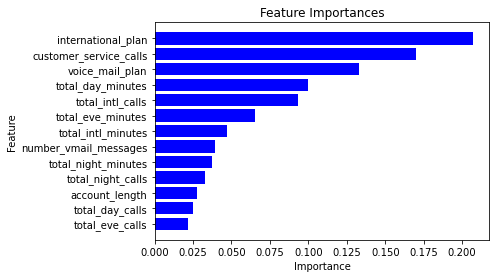

In [29]:
fig, ax = plt.subplots()
ax.barh(importance_df['feature'], importance_df['importance'], color='blue')
ax.invert_yaxis()  # Invert the y-axis to show the most important features at the top
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances')
plt.show()

Based on the feature importance chart, the three most important features for predicting customer churn are international_plan, voice_mail_plan, and customer_service_calls. This suggests that customers who have an international plan are more likely to churn, as are those with a voice mail plan. In addition, customers who have made a larger number of customer service calls are also more likely to churn.

With this information, the telephone company can take steps to reduce churn and retain customers. For example, they could investigate whether their international plans are meeting the needs of their customers or if there are alternative plans that may be more suitable. The company could also evaluate the importance of offering voice mail plans to customers, and consider the impact on churn rates if such plans are not offered. Finally, they may want to review their customer service processes and practices to identify areas that could be improved to reduce the number of customer service calls and, in turn, decrease the likelihood of churn.